In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [54]:
store_data = pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\rossmann-store-sales\store.csv")
train_data = pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\rossmann-store-sales\train.csv")
test_data = pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\rossmann-store-sales\test.csv")
submission_data = pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\rossmann-store-sales\sample_submission.csv")

In [55]:
# Print shape of each data array
print("Array Shapes:")

print("\tStore data shape:", store_data.shape)

print("\tTrain data shape:", train_data.shape) 

print("\tTest data shape:", test_data.shape)

print("\tSubmission data shape:", submission_data.shape)

Array Shapes:
	Store data shape: (1115, 10)
	Train data shape: (1017209, 9)
	Test data shape: (41088, 8)
	Submission data shape: (41088, 2)


In [56]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [57]:
train_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [58]:
train_data.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [59]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [60]:
test_data.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [61]:
test_data.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [62]:
# drop missing value
test_data = test_data.dropna()

In [63]:
# Save original column names 
original_cols = test_data.columns

# Drop missing values
test_data = test_data.dropna() 

# Get new column names
new_cols = test_data.columns

# Print dropped columns
print("Dropped columns:")
print(set(original_cols) - set(new_cols))

Dropped columns:
set()


In [64]:
store_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [65]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [66]:
store_data.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [67]:
store_data.nunique()

Store                        1115
StoreType                       4
Assortment                      3
CompetitionDistance           654
CompetitionOpenSinceMonth      12
CompetitionOpenSinceYear       23
Promo2                          2
Promo2SinceWeek                24
Promo2SinceYear                 7
PromoInterval                   3
dtype: int64

In [68]:
def fill_na(series):
    if series.dtype == 'object': 
        return series.fillna(series.mode()[0])
    else:
        return series.fillna(series.mean())

store_data = store_data.apply(fill_na)

In [69]:
store_data.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [70]:
submission_data.isnull().sum()

Id       0
Sales    0
dtype: int64

In [71]:
submission_data.info

<bound method DataFrame.info of           Id  Sales
0          1      0
1          2      0
2          3      0
3          4      0
4          5      0
...      ...    ...
41083  41084      0
41084  41085      0
41085  41086      0
41086  41087      0
41087  41088      0

[41088 rows x 2 columns]>

Verify if the distribution of promotions is similiar in both the training and test sets

Text(0.5, 1.0, 'Test Data')

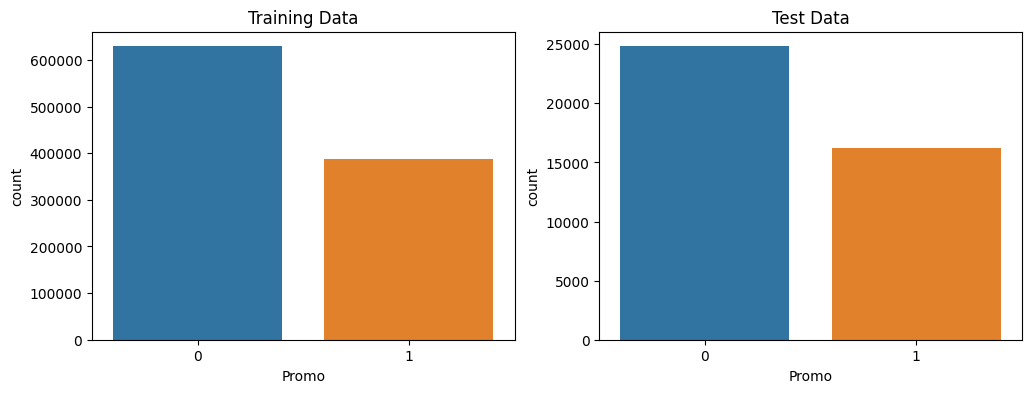

In [72]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

sns.countplot(x='Promo', data=train_data, ax=axs[0])
axs[0].set_title('Training Data')

sns.countplot(x='Promo', data=test_data, ax=axs[1])  
axs[1].set_title('Test Data')

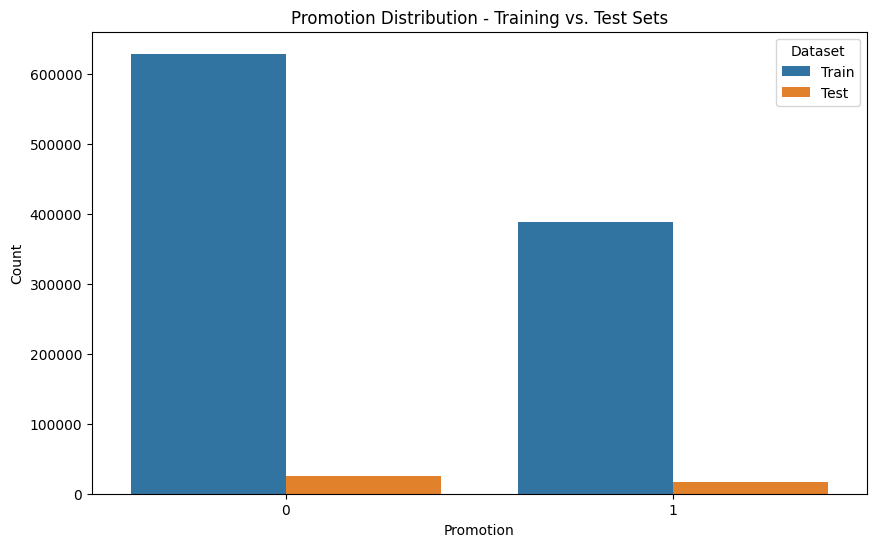

In [73]:
# Compare promotion distribution between training and test sets
plt.figure(figsize=(10, 6))
sns.countplot(x='Promo', hue='Dataset', data=pd.concat([train_data.assign(Dataset='Train'), test_data.assign(Dataset='Test')]))
plt.title('Promotion Distribution - Training vs. Test Sets')
plt.xlabel('Promotion')
plt.ylabel('Count')
plt.show()

Compare sales before after and during holidays

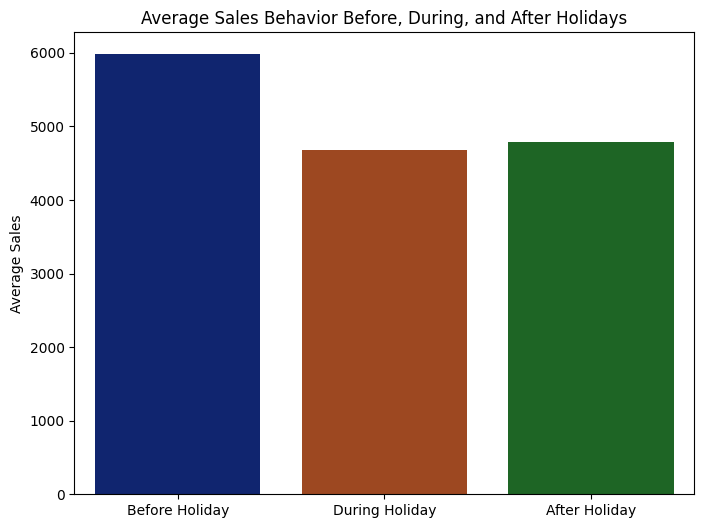

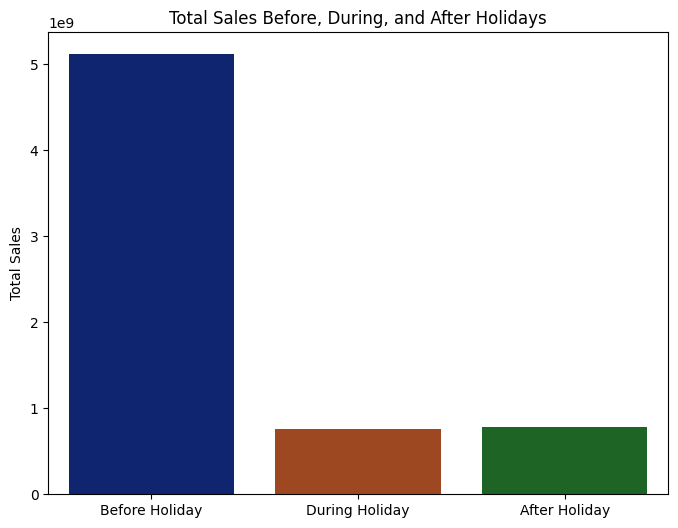

In [74]:
class SalesAnalysis:
    def __init__(self, train_data):
        self.train_data = train_data.copy()
        self.train_data['Date'] = pd.to_datetime(self.train_data['Date'])
        self.train_data['Year'] = self.train_data['Date'].dt.year
        self.train_data['Month'] = self.train_data['Date'].dt.month
        self.train_data['DayOfMonth'] = self.train_data['Date'].dt.day

        self.train_data['Holiday'] = self.train_data['SchoolHoliday'].apply(lambda x: 1 if x != '0' else 0)
        self.train_data['Holiday'] = self.train_data['StateHoliday'].apply(lambda x: 1 if x != '0' else 0)

        self.train_data['Christmas'] = self.train_data['Date'].apply(lambda x: 1 if self.is_christmas(x) else 0)
        self.train_data['Easter'] = self.train_data['Date'].apply(lambda x: 1 if self.is_easter(x) else 0)
        self.train_data['Labour Day'] = self.train_data['Date'].apply(lambda x: 1 if self.is_labour_day(x) else 0)
        self.train_data['Good Friday'] = self.train_data['Date'].apply(lambda x: 1 if self.is_good_friday(x) else 0)

    def is_christmas(self, date):
        return date.month == 12 and date.day == 25

    def is_easter(self, date):
        return date.month == 4 and date.day == 9

    def is_labour_day(self, date):
        return date.month == 5 and date.day == 1

    def is_good_friday(self, date):
        return date.month == 4 and date.day == 7

    def plot_average_sales_behavior(self):
        before_holiday_sales = self.train_data[self.train_data['Holiday'] == 0]['Sales']
        during_holiday_sales = self.train_data[self.train_data['Holiday'] == 1]['Sales']
        after_holiday_sales = self.train_data[self.train_data['Holiday'].shift(-1) == 1]['Sales']

        average_sales_before_holiday = before_holiday_sales.mean()
        average_sales_during_holiday = during_holiday_sales.mean()
        average_sales_after_holiday = after_holiday_sales.mean()

        plt.figure(figsize=(8, 6))
        sns.barplot(x=['Before Holiday', 'During Holiday', 'After Holiday'],
                    y=[average_sales_before_holiday, average_sales_during_holiday, average_sales_after_holiday],
                    palette='dark')
        plt.title('Average Sales Behavior Before, During, and After Holidays')
        plt.ylabel('Average Sales')
        plt.show()

    def plot_total_sales_behavior(self):
        before_holiday_sales = self.train_data[self.train_data['Holiday'] == 0]['Sales']
        during_holiday_sales = self.train_data[self.train_data['Holiday'] == 1]['Sales']
        after_holiday_sales = self.train_data[self.train_data['Holiday'].shift(-1) == 1]['Sales']

        total_sales_before_holiday = before_holiday_sales.sum()
        total_sales_during_holiday = during_holiday_sales.sum()
        total_sales_after_holiday = after_holiday_sales.sum()

        plt.figure(figsize=(8, 6))
        sns.barplot(x=['Before Holiday', 'During Holiday', 'After Holiday'],
                    y=[total_sales_before_holiday, total_sales_during_holiday, total_sales_after_holiday],
                    palette='dark')
        plt.title('Total Sales Before, During, and After Holidays')
        plt.ylabel('Total Sales')
        plt.show()

# Assuming you have 'train_data' DataFrame
sales_analysis = SalesAnalysis(train_data)
sales_analysis.plot_average_sales_behavior()
sales_analysis.plot_total_sales_behavior()


seasonal purchase behaviours

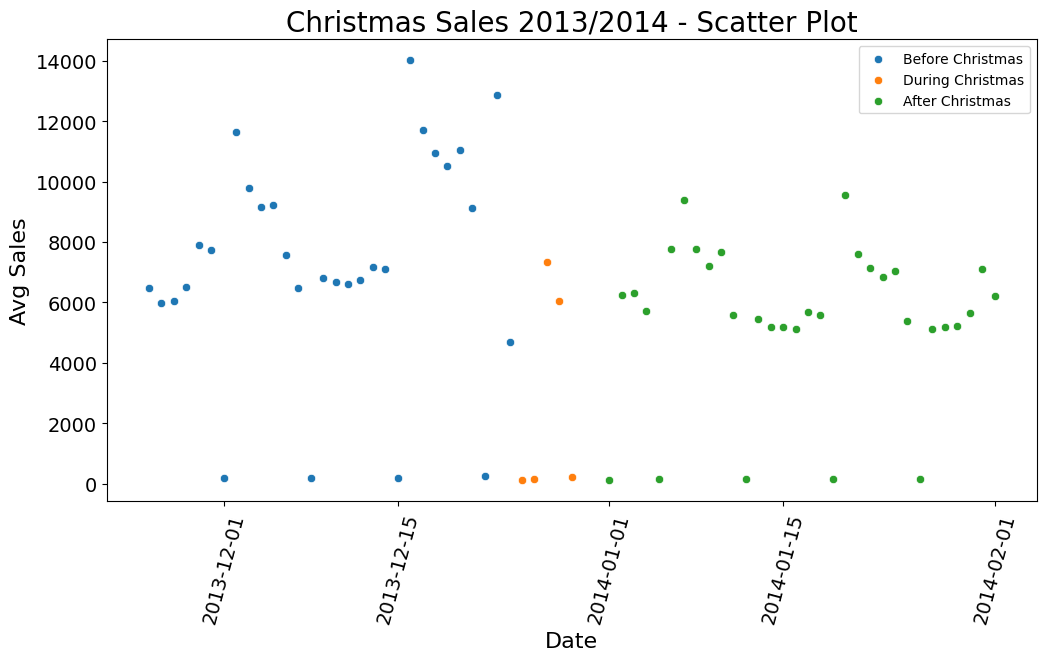

In [75]:
#seasonal Purchase behaviour
train_data['Date'] = pd.to_datetime(train_data['Date'])

date_ranges = {
    "Before Christmas": (pd.to_datetime("2013-11-25"), pd.to_datetime("2013-12-25")),
    "During Christmas": (pd.to_datetime("2013-12-25"), pd.to_datetime("2013-12-30")),
    "After Christmas": (pd.to_datetime("2014-01-01"), pd.to_datetime("2014-02-02"))
}

plt.figure(figsize=(12, 6))
for label, (start_date, end_date) in date_ranges.items():
    index = (train_data["Date"] >= start_date) & (train_data["Date"] < end_date)
    data = train_data[index].groupby("Date").agg({"Sales": "mean"})
    sns.scatterplot(x=data.index, y=data["Sales"], label=label)

plt.title("Christmas Sales 2013/2014 - Scatter Plot", size=20)
plt.xticks(rotation=75, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(xlabel="Date", fontsize=16)
plt.ylabel(ylabel="Avg Sales", fontsize=16)
plt.show()


1. 1 month before christamss has a very high sales behavior especially the last two weeks before christmass has the highest peak of sales through the 2 month christmas period

2. during 5 days of christmass the sales gets lower.

3. then it stays low for two weeks after dec-30 then starts rising slowly for the next 1 month

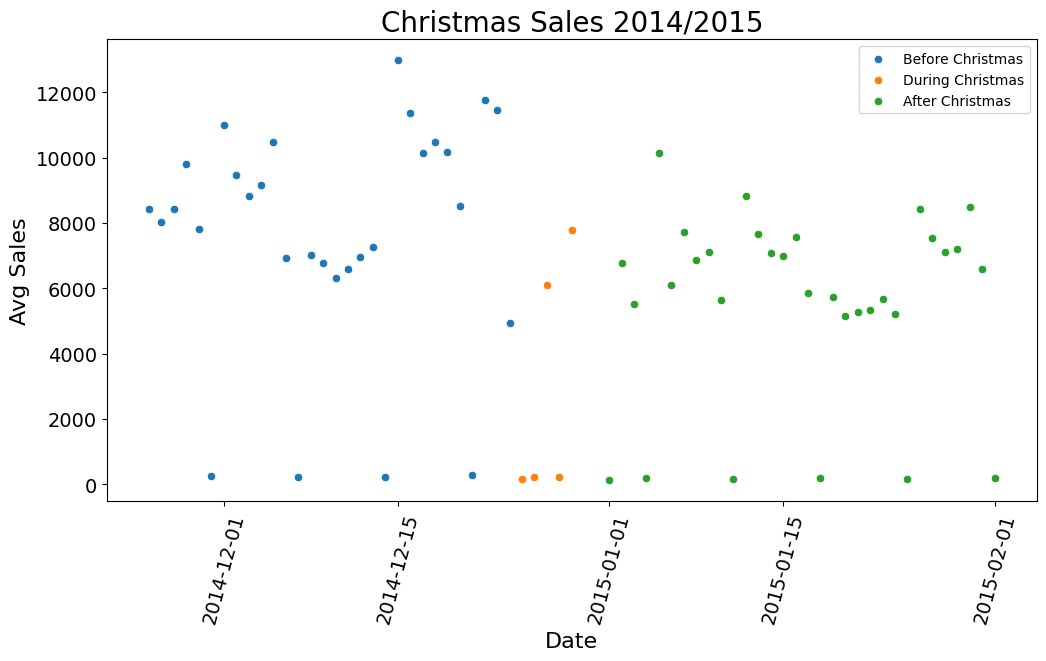

In [76]:
class ChristmasSalesAnalysis:
    def __init__(self, train_data):
        self.train_data = train_data.copy()
        self.train_data['Date'] = pd.to_datetime(self.train_data['Date'])

    def calculate_average_sales(self, start_date, end_date):
        index = (self.train_data["Date"] >= pd.to_datetime(start_date)) & (self.train_data["Date"] < pd.to_datetime(end_date))
        return self.train_data[index].groupby("Date").agg({"Sales": "mean"})

    def plot_sales(self, date_ranges, title, plot_type='line'):
        plt.figure(figsize=(12, 6))
        for label, (start_date, end_date) in date_ranges.items():
            data = self.calculate_average_sales(start_date, end_date)
            if plot_type == 'line':
                sns.lineplot(x=data.index, y=data["Sales"], label=label)
            elif plot_type == 'scatter':
                sns.scatterplot(x=data.index, y=data["Sales"], label=label)

        plt.title(title, size=20)
        plt.xticks(rotation=75, fontsize=14)
        plt.yticks(fontsize=14)
        plt.xlabel(xlabel="Date", fontsize=16)
        plt.ylabel(ylabel="Avg Sales", fontsize=16)
        plt.show()

# Assuming you have 'train_data' DataFrame
train_data['Date'] = pd.to_datetime(train_data['Date'])

date_ranges = {
    "Before Christmas": ("2014-11-25", "2014-12-25"),
    "During Christmas": ("2014-12-25", "2014-12-30"),
    "After Christmas": ("2015-01-01", "2015-02-02")
}

# Create an instance of the ChristmasSalesAnalysis class
sales_analysis_2014_2015 = ChristmasSalesAnalysis(train_data)

# Plot the sales data as a scatter plot
sales_analysis_2014_2015.plot_sales(date_ranges, "Christmas Sales 2014/2015", plot_type='scatter')


1. Christmass behaviour on 2014/15 has the same pattern as 2013/2014

correlation between sales and number of customers

Correlation between Sales and Number of Customers: 0.8947107733016958


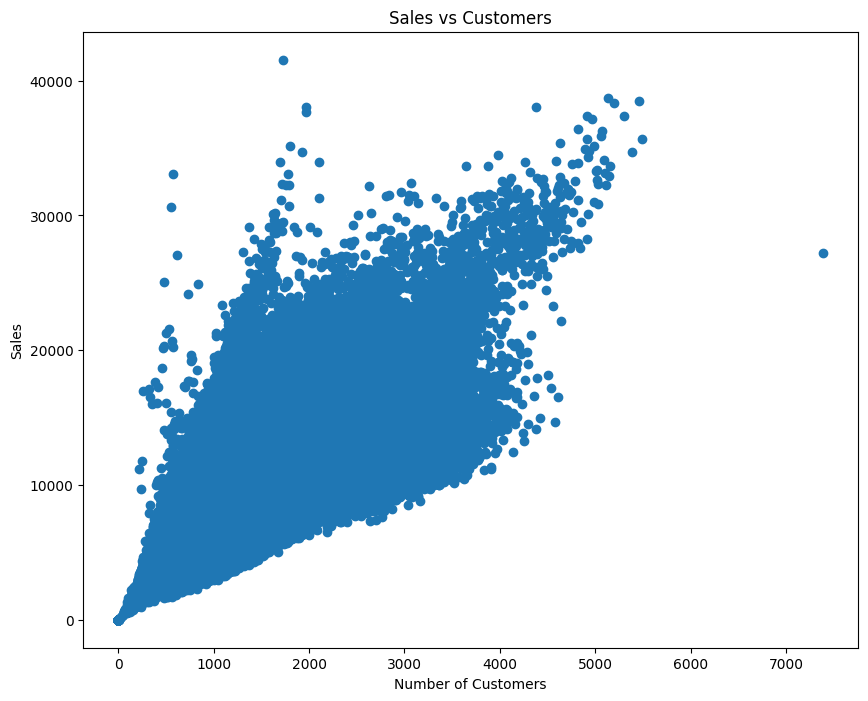

In [77]:
class SalesCorrelationAnalysis:
    def __init__(self, train_data):
        self.train_data = train_data.copy()

    def calculate_correlation(self):
        return self.train_data["Sales"].corr(self.train_data["Customers"])

    def plot_scatter(self):
        plt.figure(figsize=(10, 8))
        plt.scatter(self.train_data['Customers'], self.train_data['Sales'])
        plt.ylabel("Sales")
        plt.xlabel("Number of Customers")
        plt.title("Sales vs Customers")
        plt.show()

def create_sales_analysis(train_data):
    return SalesCorrelationAnalysis(train_data)

# Assuming you have 'train_data' DataFrame
train_data['Date'] = pd.to_datetime(train_data['Date'])

# Create an instance of the SalesCorrelationAnalysis class using the factory function
correlation_analysis = create_sales_analysis(train_data)

# Calculate and print the correlation
correlation = correlation_analysis.calculate_correlation()
print("Correlation between Sales and Number of Customers:", correlation)

# Plot the scatter plot
correlation_analysis.plot_scatter()


,Sales,Customers
Sales,1.000000,0.894711
Customers,0.894711,1.000000


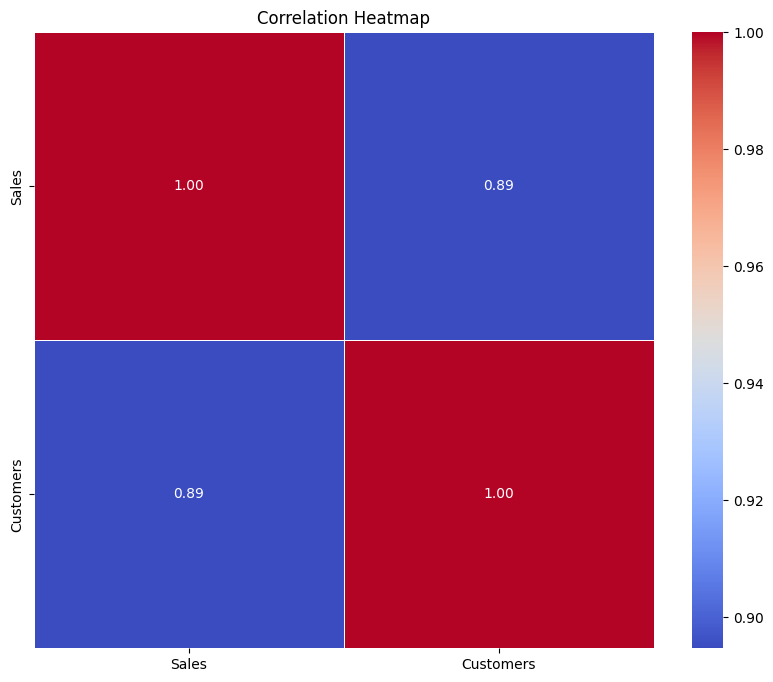

In [78]:
def calculate_correlation(train_data):
    return train_data[["Sales", "Customers"]].corr()

def plot_heatmap(corr_matrix):
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Heatmap')
    plt.show()

train_data['Date'] = pd.to_datetime(train_data['Date'])

# Calculate and display the correlation
sales_customers_corr = calculate_correlation(train_data)
display(sales_customers_corr)

# Plot the correlation heatmap
plot_heatmap(sales_customers_corr)


Promo affect sales 

Promotion Effect on Sales and Customers:
   Promo        Sales   Customers
0      0  4406.050805  517.823542
1      1  7991.152046  820.098815


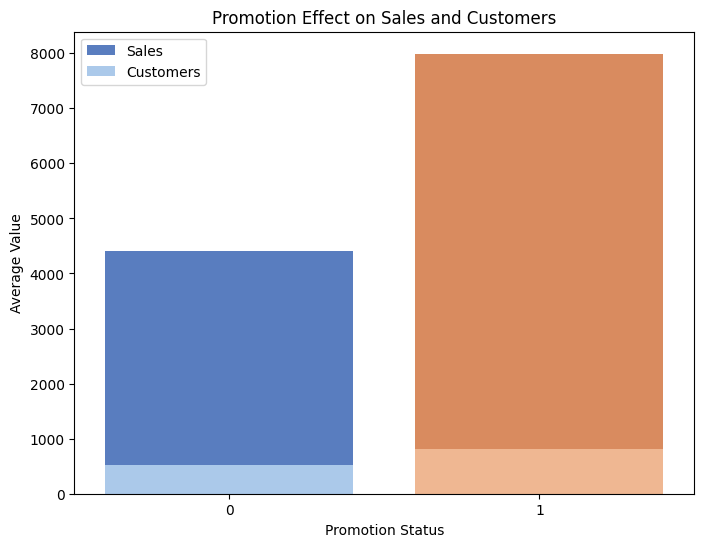

In [79]:
class PromotionEffectAnalysis:
    def __init__(self, train_data):
        self.train_data = train_data.copy()

    def calculate_promotion_effect(self):
        return self.train_data.groupby("Promo").agg({
            "Sales": "mean",
            "Customers": "mean"
        }).reset_index()

    def plot_promotion_effect(self):
        promo_effect = self.calculate_promotion_effect()

        plt.figure(figsize=(8, 6))
        sns.barplot(x="Promo", y="Sales", data=promo_effect, ci=None, palette='muted', label='Sales')
        sns.barplot(x="Promo", y="Customers", data=promo_effect, ci=None, palette='pastel', label='Customers')
        plt.xlabel("Promotion Status")
        plt.ylabel("Average Value")
        plt.title("Promotion Effect on Sales and Customers")
        plt.legend()
        plt.show()

# Assuming you have 'train_data' DataFrame
train_data['Date'] = pd.to_datetime(train_data['Date'])

# Create an instance of the PromotionEffectAnalysis class
promotion_analysis = PromotionEffectAnalysis(train_data)

# Calculate and display the promotion effect
promo_effect = promotion_analysis.calculate_promotion_effect()
print("Promotion Effect on Sales and Customers:")
print(promo_effect)

# Plot the promotion effect with different colors
promotion_analysis.plot_promotion_effect()


Average Sales during Promotion: 7991.15
Average Sales without Promotion: 4406.05
Average Customers during Promotion: 820.10
Average Customers without Promotion: 517.82


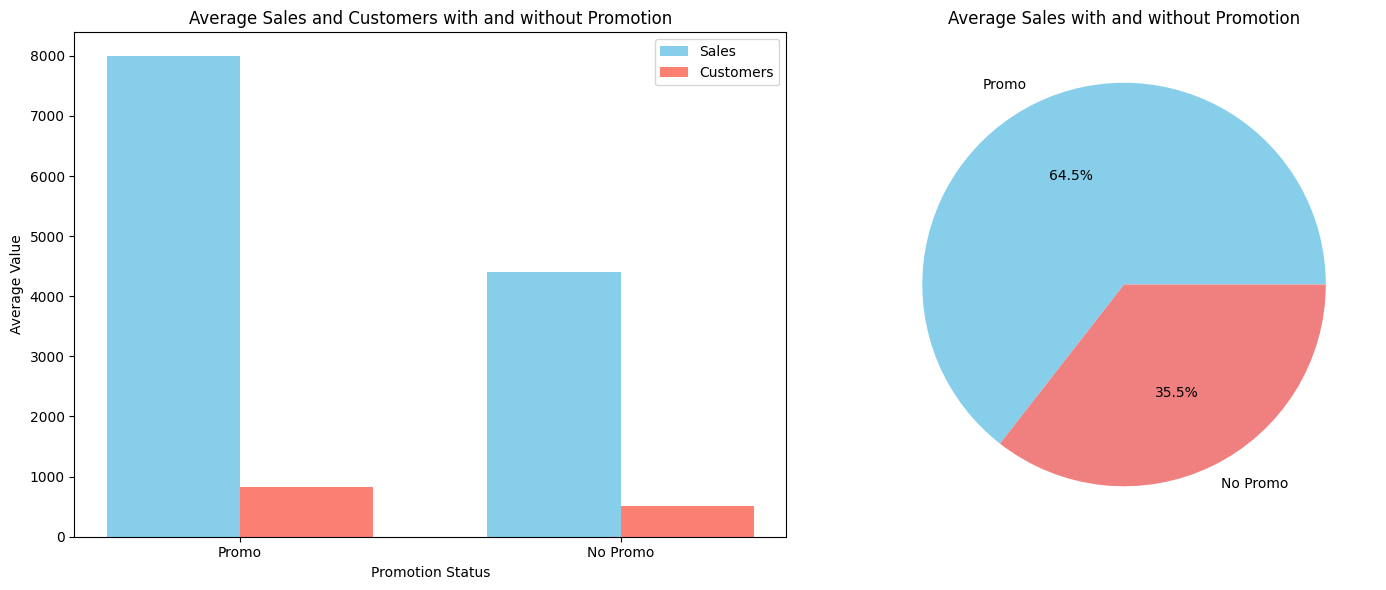

In [80]:
class PromotionAnalysis:
    def __init__(self, train_data):
        self.train_data = train_data.copy()

    def calculate_average_metrics(self, promo_status, metric):
        return self.train_data[self.train_data["Promo"] == promo_status][metric].mean()

    def plot_average_metrics(self):
        average_sales_promo = self.calculate_average_metrics(1, "Sales")
        average_sales_no_promo = self.calculate_average_metrics(0, "Sales")

        average_customers_promo = self.calculate_average_metrics(1, "Customers")
        average_customers_no_promo = self.calculate_average_metrics(0, "Customers")

        # Print the results
        print(f"Average Sales during Promotion: {average_sales_promo:.2f}")
        print(f"Average Sales without Promotion: {average_sales_no_promo:.2f}")
        print(f"Average Customers during Promotion: {average_customers_promo:.2f}")
        print(f"Average Customers without Promotion: {average_customers_no_promo:.2f}")

        # Plot the results using a grouped bar chart and a pie chart
        plt.figure(figsize=(15, 6))

        # Grouped bar chart
        x = ["Promo", "No Promo"]
        width = 0.35
        plt.subplot(121)
        plt.bar(x, [average_sales_promo, average_sales_no_promo], width, label='Sales', color='skyblue')
        plt.bar([i + width for i in range(len(x))], [average_customers_promo, average_customers_no_promo], width, label='Customers', color='salmon')
        plt.xlabel("Promotion Status")
        plt.ylabel("Average Value")
        plt.title("Average Sales and Customers with and without Promotion")
        plt.xticks([i + width/2 for i in range(len(x))], x)
        plt.legend()

        # Pie chart for average sales
        labels = ["Promo", "No Promo"]
        sales_values = [average_sales_promo, average_sales_no_promo]
        plt.subplot(122)
        plt.pie(sales_values, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
        plt.title("Average Sales with and without Promotion")

        plt.tight_layout()
        plt.show()

# Assuming you have 'train_data' DataFrame
train_data['Date'] = pd.to_datetime(train_data['Date'])

# Create an instance of the PromotionAnalysis class
promotion_analysis = PromotionAnalysis(train_data)

# Plot the average metrics using a grouped bar chart and a pie chart
promotion_analysis.plot_average_metrics()


The analysis highlights the significance of promotions in driving sales and customer engagement. Well-timed and strategic promotions can attract new customers and boost revenue. A comprehensive marketing strategy should consider various factors like promotion type, product offerings, and market conditions to maximize the benefits of promotions.

Trends of customer behavior during store open and closing times

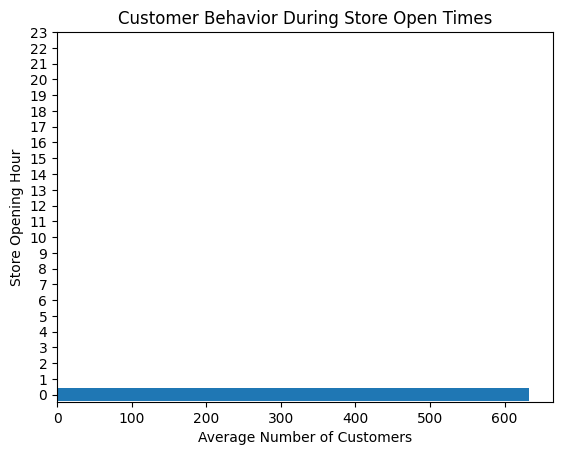

In [81]:
# Create a new column "Open_Hour" with the hour of the store's opening time
train_data['Open_Hour'] = pd.to_datetime(train_data['Open']).dt.hour

# Plot the average number of customers vs. store opening hour using a horizontal bar plot
average_customers_by_hour = train_data.groupby('Open_Hour')['Customers'].mean()
plt.barh(average_customers_by_hour.index, average_customers_by_hour.values)
plt.xlabel('Average Number of Customers')
plt.ylabel('Store Opening Hour')
plt.title('Customer Behavior During Store Open Times')
plt.yticks(np.arange(0, 24))
plt.show()


<Figure size 1200x700 with 0 Axes>

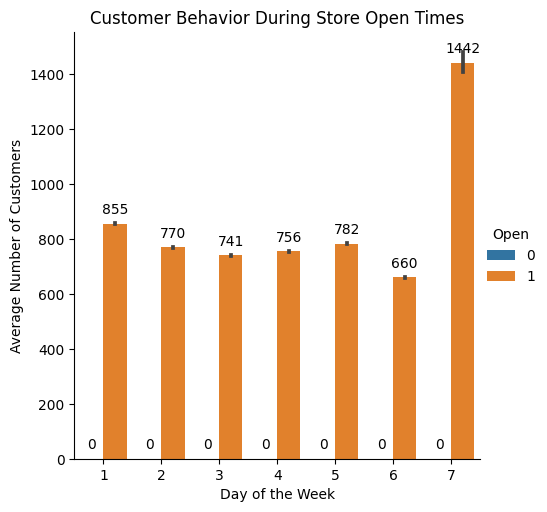

In [82]:
# Create a new column "Open_Hour" with the hour of the store's opening time
train_data['Open_Hour'] = pd.to_datetime(train_data['Open']).dt.hour

# Plot the average number of customers vs. store opening hour using seaborn catplot
plt.figure(figsize=(12, 7))
ax = sns.catplot(data=train_data, x="DayOfWeek", y="Customers", hue="Open", kind="bar", sharex=False)
plt.xlabel('Day of the Week')
plt.ylabel('Average Number of Customers')
plt.title('Customer Behavior During Store Open Times')

# Add numbers on top of each bar
for p in ax.ax.patches:
    height = p.get_height()
    ax.ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                   ha='center', va='bottom', fontsize=10, xytext=(0, 5),
                   textcoords='offset points')

plt.show()


Which stores are opened on all weekdays? How does that affect their sales on weekends?

<Figure size 1200x700 with 0 Axes>

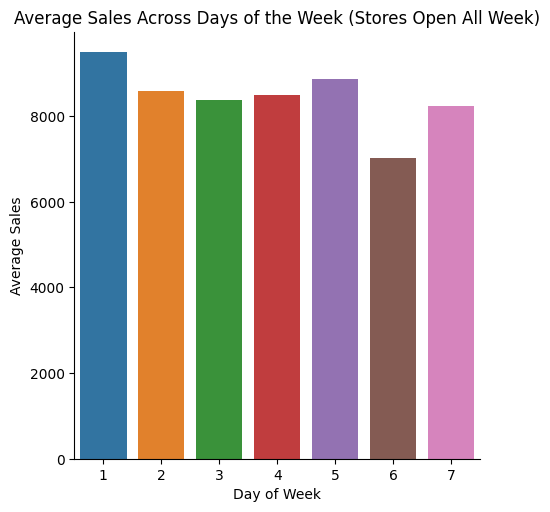

Stores That Work All Week: 33


In [83]:

def plot_average_sales_all_week(train_data):
    # Filter stores with unique DayOfWeek count equal to 7
    open_stores = train_data[train_data.Open == 1]
    each_day = open_stores[['Store', 'DayOfWeek']].groupby('Store').nunique()
    all_week_stores = each_day[each_day.DayOfWeek == 7]
    stores_id = all_week_stores.reset_index()['Store']

    get_stores = open_stores[open_stores.Store.isin(set(stores_id))]
    get_stores = get_stores[['Store', 'Sales', 'Customers', 'DayOfWeek']]

    week_sales = get_stores.groupby('DayOfWeek').mean().reset_index()

    # Plot the average sales across days of the week for stores open all week
    plt.figure(figsize=(12, 7))
    sns.catplot(data=week_sales, x="DayOfWeek", y="Sales", kind="bar", sharex=False)
    plt.xlabel('Day of Week')
    plt.ylabel('Average Sales')
    plt.title('Average Sales Across Days of the Week (Stores Open All Week)')
    plt.show()

    print(f'Stores That Work All Week: {all_week_stores.shape[0]}')

# Assuming you have 'train_data' DataFrame
train_data['Date'] = pd.to_datetime(train_data['Date'])

# Call the function to plot the average sales for stores open all week
plot_average_sales_all_week(train_data)


<Figure size 1200x700 with 0 Axes>

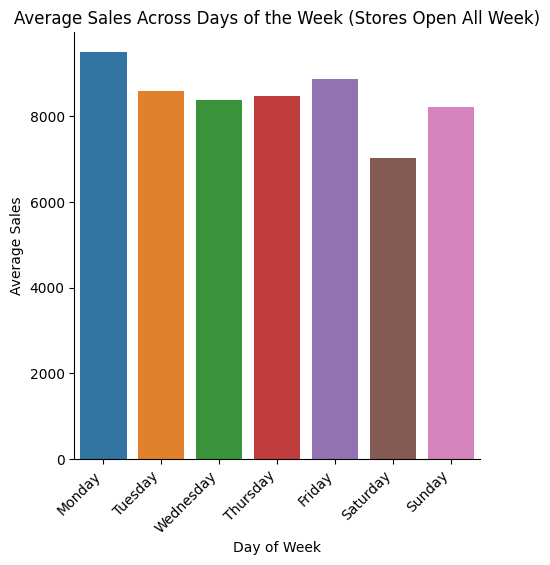

Stores That Work All Week: 33


In [84]:
def plot_average_sales_all_week(train_data):
    # Filter stores with unique DayOfWeek count equal to 7
    open_stores = train_data[train_data.Open == 1]
    each_day = open_stores[['Store', 'DayOfWeek']].groupby('Store').nunique()
    all_week_stores = each_day[each_day.DayOfWeek == 7]
    stores_id = all_week_stores.reset_index()['Store']

    get_stores = open_stores[open_stores.Store.isin(set(stores_id))]
    get_stores = get_stores[['Store', 'Sales', 'Customers', 'DayOfWeek']]

    week_sales = get_stores.groupby('DayOfWeek').mean().reset_index()

    # Map day of week numbers to day names
    day_names = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'}
    week_sales['DayOfWeek'] = week_sales['DayOfWeek'].map(day_names)

    # Plot the average sales across days of the week for stores open all week
    plt.figure(figsize=(12, 7))
    ax = sns.catplot(data=week_sales, x="DayOfWeek", y="Sales", kind="bar", sharex=False)
    plt.xlabel('Day of Week')
    plt.ylabel('Average Sales')
    plt.title('Average Sales Across Days of the Week (Stores Open All Week)')
    
    # Rotate x-axis labels by 45 degrees
    plt.xticks(rotation=45, ha='right')

    plt.show()

    print(f'Stores That Work All Week: {all_week_stores.shape[0]}')

# Assuming you have 'train_data' DataFrame
train_data['Date'] = pd.to_datetime(train_data['Date'])

# Call the function to plot the average sales for stores open all week
plot_average_sales_all_week(train_data)


Insight :-> we have about 33 stores that work on all weekdays, and sales on momnday and friday are higher than other days

Effect of assortment in sales ?

In [85]:
store_data['Assortment'].value_counts()

a    593
c    513
b      9
Name: Assortment, dtype: int64

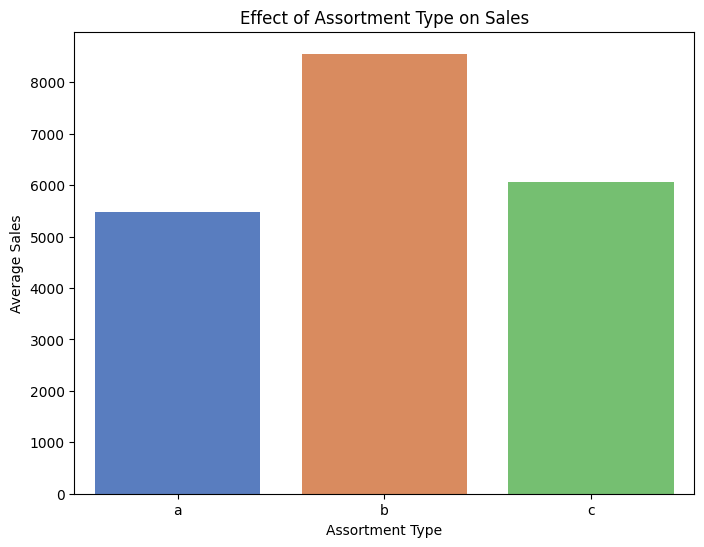

In [86]:

def plot_assortment_effect(train_data, store_data):
    # Merge train_data and store_data on 'Store' column
    train_df = pd.merge(train_data, store_data, how="inner", on="Store")
    assortment_effect = train_df.groupby('Assortment')['Sales'].mean().reset_index()

    # Create a bar plot to visualize the effect of assortment type on sales
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Assortment', y='Sales', data=assortment_effect, palette='muted')
    plt.xlabel('Assortment Type')
    plt.ylabel('Average Sales')
    plt.title('Effect of Assortment Type on Sales')
    plt.show()

# Assuming you have 'train_data' and 'store_data' DataFrames
train_data['Date'] = pd.to_datetime(train_data['Date'])

# Call the function to plot the effect of assortment type on sales
plot_assortment_effect(train_data, store_data)


How does the proximity to the nearest competitor impact sales? If both the store and its competitors are located in city centers, does the distance still have a significant effect on sales?

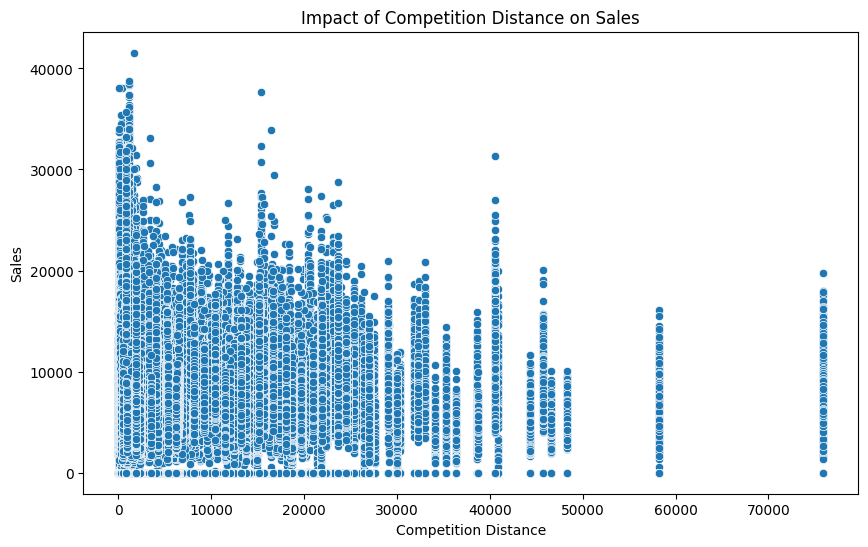

In [87]:
def plot_competition_distance_vs_sales(train_data, store_data):
    # Merge train_data and store_data on 'Store' column
    merged_df = pd.merge(train_data, store_data, on="Store")

    # Plot the relationship between CompetitionDistance and Sales
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x="CompetitionDistance", y="Sales", data=merged_df)
    plt.title("Impact of Competition Distance on Sales")
    plt.xlabel("Competition Distance")
    plt.ylabel("Sales")
    plt.show()

# Assuming you have 'train_data' and 'store_data' DataFrames
train_data['Date'] = pd.to_datetime(train_data['Date'])

# Call the function to plot the relationship between competition distance and sales
plot_competition_distance_vs_sales(train_data, store_data)


How does the opening or reopening of new competitors affect stores? Check for stores with NA as competitor distance but later on has values for competitor distance ?

In [88]:
# Merge train_data with store_data based on the 'Store' column
train_df = pd.merge(train_data, store_data, on='Store')

# Now you can proceed with the code you provided
has_open_competition_df = train_df[train_df['CompetitionOpenSinceMonth'].notnull()]
# ... rest of the code ...

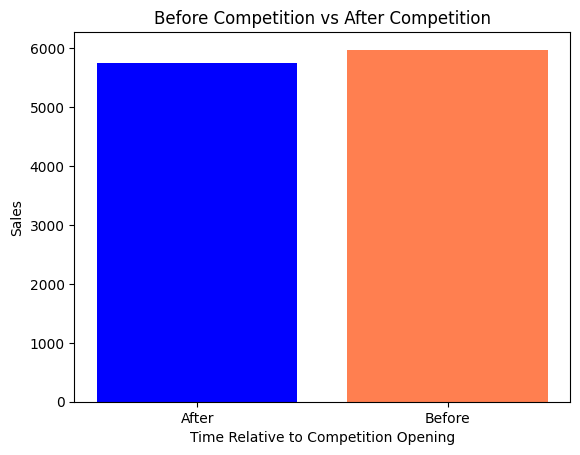

In [89]:

# Filter rows with competition opening information
has_open_competition_df = train_df[train_df['CompetitionOpenSinceMonth'].notnull()]

# Convert 'CompetitionOpenSinceYear' and 'CompetitionOpenSinceMonth' to datetime format
has_open_competition_df["CompetitionOpenSinceYear"] = has_open_competition_df["CompetitionOpenSinceYear"].astype("int").astype("str")
has_open_competition_df["CompetitionOpenSinceMonth"] = has_open_competition_df["CompetitionOpenSinceMonth"].astype("int").astype("str")
has_open_competition_df["CompetitionOpenSinceDate"] = has_open_competition_df["CompetitionOpenSinceYear"] + "-" + has_open_competition_df["CompetitionOpenSinceMonth"] + "-" + "01" 
has_open_competition_df["CompetitionOpenSinceDate"] = pd.to_datetime(has_open_competition_df["CompetitionOpenSinceDate"])

# Create a new dataframe 'competition_df' with relevant columns
competition_df = has_open_competition_df[["Date", "Sales", "Store", "CompetitionOpenSinceDate"]]

# Calculate whether sales are before or after the competition opening date
competition_df["BeforeCompetition"] = competition_df["Date"] < competition_df["CompetitionOpenSinceDate"]

# Aggregate sales mean based on before/after competition opening
competition_df_agg = competition_df.groupby("BeforeCompetition").agg({"Sales": "mean"})

# Create a new dataframe 'plot_df' for plotting
x_col = ["Before" if val else "After" for val in competition_df_agg.index]
plot_df = pd.DataFrame({"x_col": x_col, "Sales_mean": competition_df_agg["Sales"]})

# Plot the bar graph
plt.bar(plot_df["x_col"], plot_df["Sales_mean"], color=["Blue", "coral"])
plt.xlabel("Time Relative to Competition Opening")
plt.ylabel("Sales")
plt.title("Before Competition vs After Competition")
plt.show()


In [90]:
# Calculate the sales decrease and print the results
decrease_percent = (competition_df_agg["Sales"][True] - competition_df_agg["Sales"][False]) / competition_df_agg["Sales"][True]
print("Overall avg sales before competition and after competition")
display(competition_df_agg)
print(f"Overall avg sales decreased after competition by {decrease_percent * 100:.3f}%")


Overall avg sales before competition and after competition


,Sales
BeforeCompetition,
False,5755.586092
True,5974.642737


Overall avg sales decreased after competition by 3.666%


* As we can observe from the graph the sales has dropped when new competition is opened.
* But the effect is not that much, it only decreased by 3.666%